In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [60]:
df.job_posted_date = pd.to_datetime(df.job_posted_date)

In [61]:
df.job_skills = df.job_skills.apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [63]:
df_Italy = df[df['job_country'] == 'Italy']

In [66]:
df_Italy_exploded = df_Italy.explode('job_skills')

In [70]:
df_Italy_exploded[['job_title_short','job_skills']].head()

,job_title_short,job_skills
46,Data Analyst,sas
46,Data Analyst,sas
46,Data Analyst,r
46,Data Analyst,python
46,Data Analyst,vba


In [75]:
df_Italy_count = df_Italy_exploded.groupby(by=['job_skills','job_title_short']).size()

In [77]:
df_Italy_count = df_Italy_count.reset_index(name='skill_count')

In [80]:
df_Italy_count = df_Italy_count.sort_values(by='skill_count', ascending=False)

In [81]:
df_Italy_count.head()

,job_skills,job_title_short,skill_count
849,python,Data Scientist,2841
1089,sql,Data Engineer,2034
848,python,Data Engineer,1919
291,excel,Data Analyst,1720
1090,sql,Data Scientist,1608


In [91]:
top_3_title = df_Italy_count['job_title_short'].unique().tolist()

In [92]:
top_3_title = top_3_title[:3]

In [96]:
top_3_title.sort()

In [97]:
top_3_title

['Data Analyst', 'Data Engineer', 'Data Scientist']

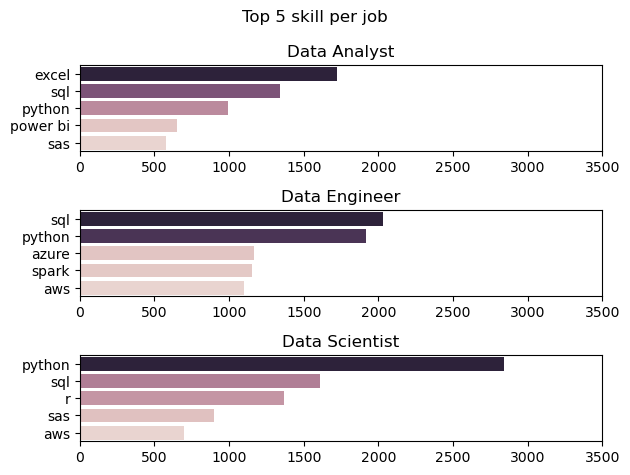

In [128]:
fig, ax = plt.subplots(len(top_3_title), 1)

for i, title in enumerate(top_3_title):
  df_plot = df_Italy_count[df_Italy_count['job_title_short'] == title].head()
  sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', legend=False, label=title)

  ax[i].set_title(title)
  ax[i].set_xlabel('')
  ax[i].set_ylabel('')
  ax[i].set_xlim(0,3500)

plt.suptitle('Top 5 skill per job')
plt.tight_layout()

In [131]:
df_job_count = df_Italy.value_counts('job_title_short').reset_index(name='job_count')

In [139]:
df_final = pd.merge(df_Italy_count, df_job_count, how='left', on='job_title_short')

In [143]:
df_final['skill_percentage'] = (df_final['skill_count']/df_final['job_count']) * 100

In [144]:
df_final

,job_skills,job_title_short,skill_count,job_count,skill_percentage
0,python,Data Scientist,2841,4396,64.626934
1,sql,Data Engineer,2034,3567,57.022708
2,python,Data Engineer,1919,3567,53.798710
3,excel,Data Analyst,1720,4543,37.860445
4,sql,Data Scientist,1608,4396,36.578708
...,...,...,...,...,...
1308,jquery,Data Engineer,1,3567,0.028035
1309,terminal,Data Analyst,1,4543,0.022012
1310,chef,Business Analyst,1,1267,0.078927
1311,julia,Data Analyst,1,4543,0.022012


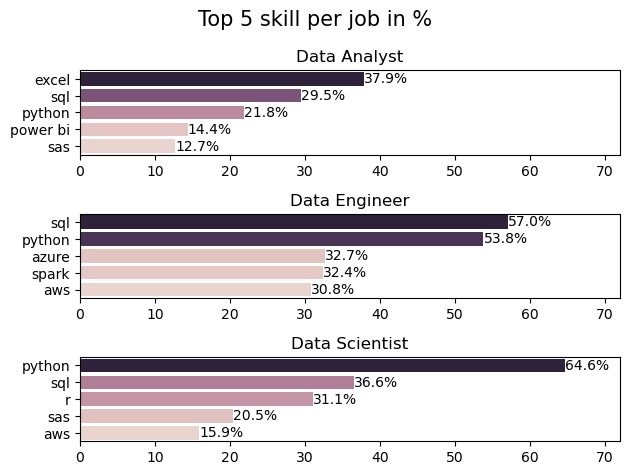

In [181]:
fig, ax = plt.subplots(len(top_3_title), 1)

for a, job_title in enumerate(top_3_title):
  df_final_plot = df_final[df_final['job_title_short'] == job_title].head()
  sns.barplot(data=df_final_plot, x='skill_percentage', y='job_skills', ax=ax[a], hue='skill_percentage', legend=False)
  ax[a].set_title(job_title)
  ax[a].set_xlabel('')
  ax[a].set_ylabel('')
  ax[a].set_xlim(0,72)

  
  for n, v in enumerate(df_final_plot['skill_percentage']):
    ax[a].text(v, n, f'{v:.1f}%', va='center')

plt.suptitle('Top 5 skill per job in %', fontsize=15)

plt.tight_layout()